<a href="https://colab.research.google.com/github/mezgoodle/ad_labs/blob/master/docs/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вступ

Створити програму, яка за даними файлу відповідно до варіантів
лабораторної No2, виконує наступні завдання:

1. Виділити один зі стовпців (на вибір) з файлу як об’єкт Series. Задати
назви індексів цього об’єкту. Виділити підмасиви за допомогою прямої
та непрямої індексацій.
2. До об’єкту DataFrame, в який записано вміст файлу, додати новий
стовпець, що є результатом операцій над іншими стовпцями.
3. Створити ієрархічну індексацію (не менше двох рівнів) для цього об’єкту
DataFrame. Продемонструвати виділення підмасивів за певною ознакою
з використанням мультиіндексації. Продемонструвати розрахунок
результату операції агрегування з використанням ієрархічних рівнів.
4. Створити декілька власних об’єктів DataFrame за такою ж тематикою, що
й файл. Наприклад, якщо тема файлу – жаби, можна створити об’єкти,
що містять розміри жаб, вагу, стать, кількість особин в популяції і т.д.
Використати описані в теоретичних відомостях параметри методу merge
для різних видів злиття даних цих об’єктів.

In [1]:
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

# Дані

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mezgoodle/ad_labs/master/data/Crime.csv')
df

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,MatureUnemployment,HighYouthUnemploy,Wage,BelowWage,CrimeRate10,Youth10,Education10,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,22,1,564,139,26.5,135,12.5,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,40,1,453,200,35.9,135,10.9,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,34,0,288,276,37.1,153,11.0,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,53,0,457,249,42.7,139,11.8,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,25,1,593,171,46.7,125,12.2,97,602,989,0,42,79,24,1,660,162
5,67.6,128,0,13.5,67,624,972,0,28,77,25,1,507,206,47.9,128,13.8,60,621,983,0,28,81,24,1,571,199
6,70.5,130,0,14.1,63,641,984,0,14,70,21,1,486,196,50.6,153,14.1,57,641,993,0,14,71,23,1,556,176
7,73.2,143,0,12.9,66,537,977,0,10,114,35,1,487,166,55.9,143,13.0,63,549,973,0,11,119,36,1,561,168
8,75.0,141,0,12.9,56,523,968,0,4,107,37,0,489,170,61.8,153,12.9,54,538,968,0,5,110,36,1,550,126
9,78.1,133,0,11.4,51,599,1024,1,7,99,27,1,425,225,65.4,134,11.2,47,600,1024,1,7,97,28,1,499,215


# Перше завдання

In [43]:
ser = pd.Series(df['CrimeRate'], index=[i for i in range(0 + 3, len(df['CrimeRate']) + 3)])
ser

3      60.3
4      64.2
5      67.6
6      70.5
7      73.2
8      75.0
9      78.1
10     79.8
11     82.3
12     83.1
13     84.9
14     85.6
15     88.0
16     92.3
17     94.3
18     95.3
19     96.8
20     97.4
21     98.7
22     99.9
23    103.0
24    104.3
25    105.9
26    106.6
27    107.2
28    108.3
29    109.4
30    112.1
31    114.3
32    115.1
33    117.2
34    119.7
35    121.6
36    123.4
37    127.2
38    132.4
39    135.5
40    137.8
41    140.8
42    145.4
43    149.3
44    154.3
45    157.7
46    161.8
47      NaN
48      NaN
49      NaN
Name: CrimeRate, dtype: float64

In [41]:
ser.loc[3:5]

3    60.3
4    64.2
5    67.6
Name: CrimeRate, dtype: float64

In [42]:
ser.iloc[3:5]

6    70.5
7    73.2
Name: CrimeRate, dtype: float64

# Друге завдання


In [46]:
df['WageRatio'] = df['Wage'] / df['StateSize']
df['WageRatio']

0      94.000000
1      75.500000
2      13.090909
3      24.052632
4      14.825000
5      18.107143
6      34.714286
7      48.700000
8     122.250000
9      60.714286
10     17.666667
11      5.061947
12     24.045455
13     27.560000
14      8.608696
15     75.142857
16     16.382353
17     12.294118
18      6.360825
19     11.939394
20     13.500000
21     12.400000
22     10.972222
23     15.916667
24     12.340426
25    196.000000
26     10.794872
27     65.555556
28     32.722222
29     20.354839
30     12.939394
31    155.000000
32     77.142857
33     21.448276
34      3.791667
35     20.086957
36      5.083333
37     11.930233
38     53.700000
39      8.025641
40     32.111111
41     62.111111
42      9.440000
43     42.846154
44      6.504950
45      4.286624
46    224.666667
Name: WageRatio, dtype: float64

# Третє завдання

In [ ]:
southern = df.query('Southern==1').CrimeRate
not_southern = df.query('Southern==0').CrimeRate

In [ ]:
_, p = stats.ttest_ind(southern, not_southern)

In [ ]:
p > alpha

True

## Результат

Оскільки значення p-value більше за значення alpha, то приймає основну гіпотезу, що в
південних штатах вища частота злочинів.


# Четверте завдання

In [ ]:
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(wage, crime_rate)
stats.linregress(wage, crime_rate)

LinregressResult(slope=0.1272180620633419, intercept=35.9703062440404, rvalue=0.4248530127607084, pvalue=0.0029142013171254465, stderr=0.04040901585488193)

Text(0, 0.5, 'crime_rate')

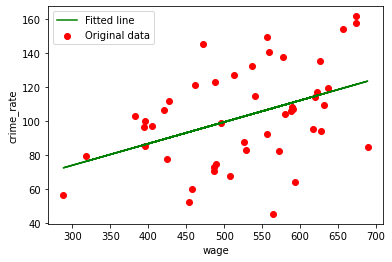

In [ ]:
# Plot linear regression line.
wage_pred = intercept + slope*wage
plt.scatter(wage, crime_rate, color="red", marker="o", label="Original data")
plt.plot(wage, wage_pred, color="green", label="Fitted line")
# Set labels
plt.legend(loc='best')
plt.xlabel('wage') 
plt.ylabel('crime_rate') 